In [1]:
import pandas as pd

DATA = '/kaggle/input/stock-market-data-fang/Stock_Market_Data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, header=[0, 1], )
df.columns = ['_'.join(col) for col in df.columns]
df = df.tail(n=len(df)-1)
df['date'] = pd.to_datetime(df['Price_Ticker'])
df = df.drop(columns=['Price_Ticker'])
drop_columns = [column for column in df.columns if column.startswith('High') or column.startswith('Low') or column.startswith('Open')]
df = df.drop(columns=drop_columns)
df.head()

,Close_AAPL,Close_AMZN,Close_DAX,Close_GOOG,Close_META,Close_NFLX,Close_TATAMOTORS.NS,Close_TSLA,Close_^NSEI,Volume_AAPL,Volume_AMZN,Volume_DAX,Volume_GOOG,Volume_META,Volume_NFLX,Volume_TATAMOTORS.NS,Volume_TSLA,Volume_^NSEI,date
1,6.447412,6.6950,NaN,15.554352,NaN,7.640000,152.195312,NaN,5232.200195,493729600.0,151998000.0,NaN,78541293.0,NaN,17239600.0,27906448.0,NaN,0.0,2010-01-04
2,6.458559,6.7345,NaN,15.485854,NaN,7.358571,149.543472,NaN,5277.899902,601904800.0,177038000.0,NaN,120638494.0,NaN,23753100.0,23669317.0,NaN,0.0,2010-01-05
3,6.355827,6.6125,NaN,15.095475,NaN,7.617143,149.773651,NaN,5281.799805,552160000.0,143576000.0,NaN,159744526.0,NaN,23290400.0,14990820.0,NaN,0.0,2010-01-06
4,6.344077,6.5000,NaN,14.744060,NaN,7.485714,144.654144,NaN,5263.100098,477131200.0,220604000.0,NaN,257533695.0,NaN,9955400.0,22722030.0,NaN,0.0,2010-01-07
5,6.386255,6.6760,NaN,14.940616,NaN,7.614286,145.446014,NaN,5244.750000,447610800.0,196610000.0,NaN,189680313.0,NaN,8180900.0,16495776.0,NaN,0.0,2010-01-08


<Axes: >

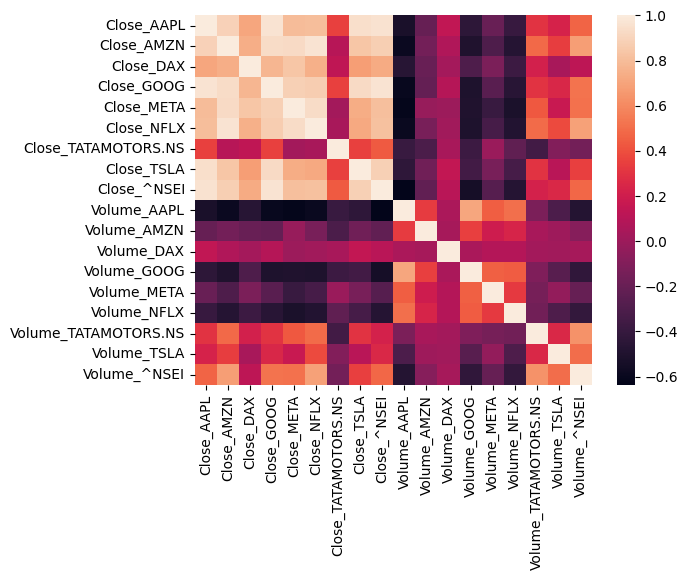

In [2]:
from seaborn import heatmap
heatmap(data=df.drop(columns=['date']).corr(numeric_only=True))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 1 to 3625
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Close_AAPL            3522 non-null   float64       
 1   Close_AMZN            3522 non-null   float64       
 2   Close_DAX             2312 non-null   float64       
 3   Close_GOOG            3522 non-null   float64       
 4   Close_META            2923 non-null   float64       
 5   Close_NFLX            3522 non-null   float64       
 6   Close_TATAMOTORS.NS   3454 non-null   float64       
 7   Close_TSLA            3400 non-null   float64       
 8   Close_^NSEI           3434 non-null   float64       
 9   Volume_AAPL           3522 non-null   float64       
 10  Volume_AMZN           3522 non-null   float64       
 11  Volume_DAX            2312 non-null   float64       
 12  Volume_GOOG           3522 non-null   float64       
 13  Volume_META       